In [2]:
#!pip install fastai --upgrade
#!pip install cityscapesscripts

from fastai.vision.all import *
import cityscapesscripts as cs
from cityscapesscripts.helpers.labels import labels

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

In [ ]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

## Segmentation - Using the high-level API

`get_image_files` function helps us grab all the image filenames

In [ ]:
fnames = get_image_files(path/"images")
fnames[0]

In [ ]:
# Look at labels folder
(path/"labels").ls()[0]

Segmentation masks have the same base names as the images but with an extra `_P`, so we can define a label function:
```python
def label_func(fn):
  return path/"labels"/f"{fn.stem}_{fn.suffix}"
```

We can then gather our data using `SegmentationDataLoaders`:

In [ ]:
def label_func(fn):
  return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [ ]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = fnames, label_func = label_func, codes=codes
)

In [ ]:
dls.show_batch(max_n=6)

In [ ]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(6)

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

## Attempt to access CityScapes data with high-level API

In [2]:
path = Path("/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data")
path.ls()

(#9) [Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/gtFine_trainvaltest.zip'),Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/gtCoarse.zip'),Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/leftImg8bit_trainvaltest.zip'),Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/leftImg8bit'),Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/gtFine'),Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/README'),Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/license.txt'),Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/gtFine_trainvaltest'),Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/leftImg8bit_trainvaltest')]

In [3]:
# Loading class labels
id2name = {name.id: name for name in labels}
print(id2name)

codes = [name.name for name in labels]
print(codes)

codes_dict = {idx:name for idx, name in enumerate(codes)}
print(codes_dict)

{0: Label(name='unlabeled', id=0, trainId=255, category='void', categoryId=0, hasInstances=False, ignoreInEval=True, color=(0, 0, 0)), 1: Label(name='ego vehicle', id=1, trainId=255, category='void', categoryId=0, hasInstances=False, ignoreInEval=True, color=(0, 0, 0)), 2: Label(name='rectification border', id=2, trainId=255, category='void', categoryId=0, hasInstances=False, ignoreInEval=True, color=(0, 0, 0)), 3: Label(name='out of roi', id=3, trainId=255, category='void', categoryId=0, hasInstances=False, ignoreInEval=True, color=(0, 0, 0)), 4: Label(name='static', id=4, trainId=255, category='void', categoryId=0, hasInstances=False, ignoreInEval=True, color=(0, 0, 0)), 5: Label(name='dynamic', id=5, trainId=255, category='void', categoryId=0, hasInstances=False, ignoreInEval=True, color=(111, 74, 0)), 6: Label(name='ground', id=6, trainId=255, category='void', categoryId=0, hasInstances=False, ignoreInEval=True, color=(81, 0, 81)), 7: Label(name='road', id=7, trainId=0, category='f

In [ ]:
# Only include codes that should be evaluated
cityscapes_codes = np.array([label.name for label in labels if not label.ignoreInEval])
cityscapes_codes

array(['road', 'sidewalk', 'building', 'wall', 'fence', 'pole',
       'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky',
       'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle',
       'bicycle'], dtype='<U13')

In [5]:
fnames = get_image_files(path/"leftImg8bit")
fnames[0]
len(fnames) # as expected

5000

In [6]:
# Define label function to locate images with masks/labels
def label_func(fn):
  label_fn = str(fn).replace('leftImg8bit', 'gtFine')[:-4] + "_color.png"
  return Path(label_fn)

In [7]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=2, fnames = fnames, label_func = label_func, codes = codes
)

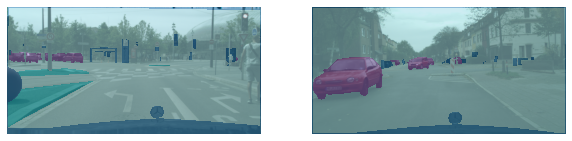

In [12]:
dls.show_batch(max_n=2, figsize=(10,7))

In [8]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


RuntimeError: ignored

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))